# Project Title (Supermart Grocery Sales)

Problem Statement:
Filtering through the dataset, it is valid to make some assertions that the store owner is most likely looking into daily sales without a more holistic view of where the parameters are more beneficial to her store. From observations, we discoverd  what we can do to make a more detailed analysis in the following areas:
1. Which region makes the most profit
2. Which city makes the most profit
3. Which category and sub-category makes the most
4. Which category and sub-category was patronized more
5. Most Outstanding customer in terms of patronage
6. Frequency of purchase, by which customer, ordered by state, region and subcategories
7. What discount they get per item
8. Trend identification in the year
9. Correlation between sales and discount

### A short description of the project

This project is a supermart grocrey sales dataset which shows important details of daily sales of customers in different regions and cities in a particular state called "Tamil Nadu".



In [55]:
#import python libraries for data manipulation and visualization

import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Inspection

load data set with this code:df=pd.read_csv('filename.csv')
This data was downloaded from Kaggle,click on this link to access the data set:
https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset

supermart data has 9994 Rows and 11 columns with no missing values.

from my observations, Date data type and column names will be modified.
    

In [56]:
# load the data
sales_record = pd.read_csv('Supermart_Grocery_Sales.csv')

In [57]:
#how many rows and columns?
#uses df.shape to check the total rows and columns
sales_record.shape

(9994, 11)

In [58]:
#does it have missing values?
#lets check if our data has missing values using.isna().sum() to give us the total number of the missing values.
sales_record.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [59]:
##let's view our first 10 data set by using the .head()function:
sales_record.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [60]:
## this is used to check the datatypes of your data columns and if they have thier supposed data types.
##we can see that order date does not have the perfect data type and some column names have whitespace.
sales_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# Data Cleansing
To make my data clean, i will change the date format and remove whitespaces from my column names.
Whitespace is the space before and/or after the actual text.
we can remove the whitespace with replace function.


In [61]:
#To check if there are null values in our dataset
sales_record.isna()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False


In [62]:
#To check the total null values in our dataset
sales_record.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [63]:
#Removing  whitespaces
##lets view our columns: 

sales_record.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [64]:
###removing whitespaces in our columns  with str.replace function from ' ' to ''
sales_record.columns = sales_record.columns.str.replace(' ', '_')

In [65]:
sales_record.columns

Index(['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City',
       'Order_Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [66]:
##now lets change our date column datatype to the right dtype using to_datetime from panda library:
sales_record['Order_Date'] = pd.to_datetime(sales_record['Order_Date'])

In [67]:
##run this code and see the changes in our Order_Date column .
sales_record['Order_Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: Order_Date, Length: 9994, dtype: datetime64[ns]

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

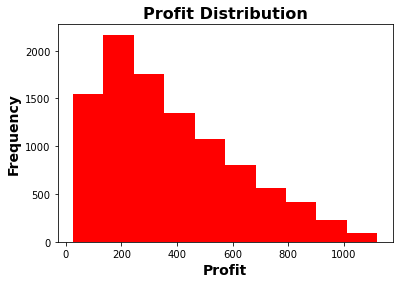

In [68]:
##using Histogram to show the highest profits made
plt.hist(sales_record['Profit'],color='red') 
plt.title('Profit Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Profit',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

### i plotted our profit column using Histogram, this chart shows that our profit is right skewed(mean>median).
i am assuming our profits has outliers,i will use BoxPlot chart to finalize my assumptions.


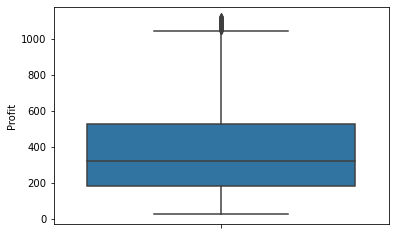

In [69]:
##using Box plot to show Outliers
sns.boxplot(y=sales_record['Profit'])
plt.show()

### using the Boxplot, we can see outliers(black shade) on our Profits

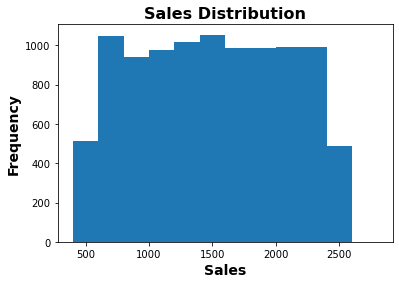

In [70]:
#using Histogram to plot our sales
plt.hist(sales_record['Sales'],bins=list(range(400,3000,200)))
plt.title('Sales Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Sales',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')

plt.show()

### Here we can see the frequency of our sales, the number of times  sales from the range of 500-600 
### turned up(520 times),etc.

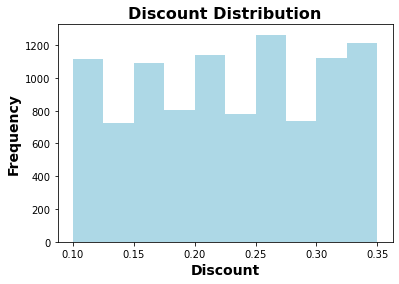

In [71]:
#Histogram to plot Discount
plt.hist(sales_record.Discount,color='lightblue')
plt.title('Discount Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Discount',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

### in this chart, our discount varies from 0.10 to 0.35.
from 0.10 to 0.12, we have close to frequency of 1100
from 0.13 to 0.14, we have frequency of 750,etc.

### which Region makes the most Profit?

In [72]:
sales_record.groupby('Region').Profit.sum()

Region
Central     856806.84
East       1074345.58
North          401.28
South       623562.89
West       1192004.61
Name: Profit, dtype: float64

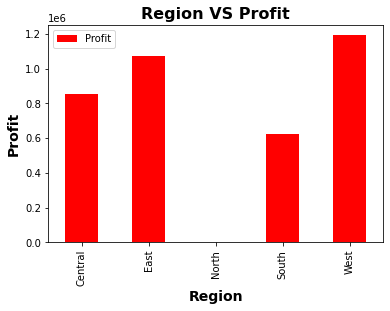

In [73]:
sales_record.groupby('Region')[['Profit']].sum().plot.bar(color='red')
plt.title('Region VS Profit',fontsize=16,fontweight='bold')
plt.xlabel('Region',fontsize=14,fontweight='bold')
plt.ylabel('Profit',fontsize=14,fontweight='bold')
plt.show()

#### from the chart, we can tell that West Region made more profit.

## Which City Makes More Profit?

In [74]:
sales_record.groupby('City')[['Profit']].mean().sort_values(by='Profit',ascending=False)


,Profit
City,
Vellore,400.167839
Perambalur,394.313802
Karur,393.734744
Bodi,392.884910
Pudukottai,381.564256
Trichy,381.120280
Ramanadhapuram,377.555891
Dharmapuri,376.577261
Kanyakumari,375.202048


Text(0, 0.5, 'Profit')

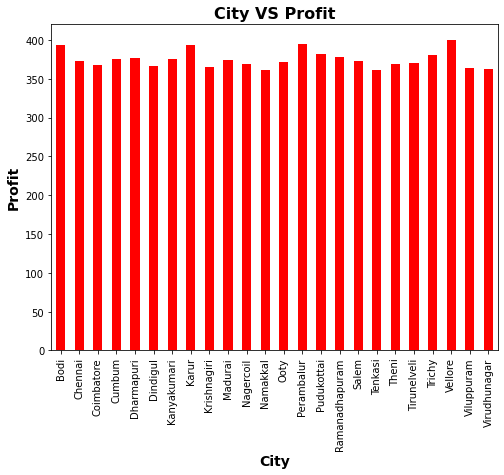

In [75]:
sales_record_city=sales_record.groupby('City')[['Profit']].mean().plot.bar(color='red',figsize=(8,6),legend=False)
plt.title('City VS Profit',fontsize=16,fontweight='bold')
plt.xlabel('City',fontsize=14,fontweight='bold')
plt.ylabel('Profit',fontsize=14,fontweight='bold')


#### Vellore City has the highest profit from our Bar Chart

## Task3a: Which Category made the highest Profit?

In [76]:
sales_record.groupby('Category')[['Profit']].sum().sort_values(by='Profit',ascending=False)

,Profit
Category,
Snacks,568178.85
"Eggs, Meat & Fish",567357.22
Fruits & Veggies,530400.38
Food Grains,529162.64
Bakery,528521.06
Beverages,525605.76
Oil & Masala,497895.29


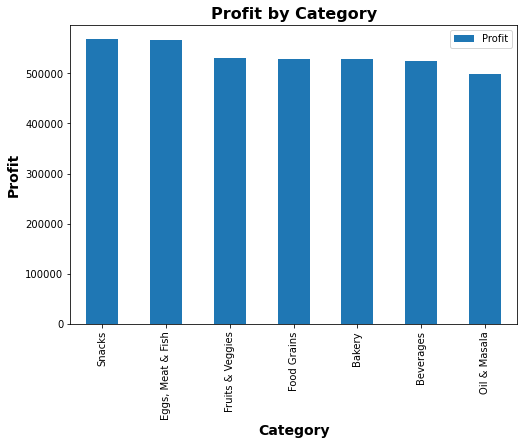

In [77]:
#plotting Bar Chart for Profit by Category
sales_record.groupby('Category')[['Profit']].sum().sort_values(by='Profit',ascending=False).plot.bar(figsize=(8,5.5))
plt.title('Profit by Category',fontsize=16,fontweight='bold')
plt.xlabel('Category',fontsize=14,fontweight='bold')
plt.ylabel('Profit',fontsize=14,fontweight='bold')
plt.show()


## The Category that made the most Profit was Snacks, followed closely by Eggs,Meat & Fish.

## Task 3B:Which Sub Category was patronized more?

In [78]:
#grouping sub_category by Category
sales_record.groupby('Category')[['Sub_Category']].count().sort_values(by='Sub_Category',ascending=False)

,Sub_Category
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


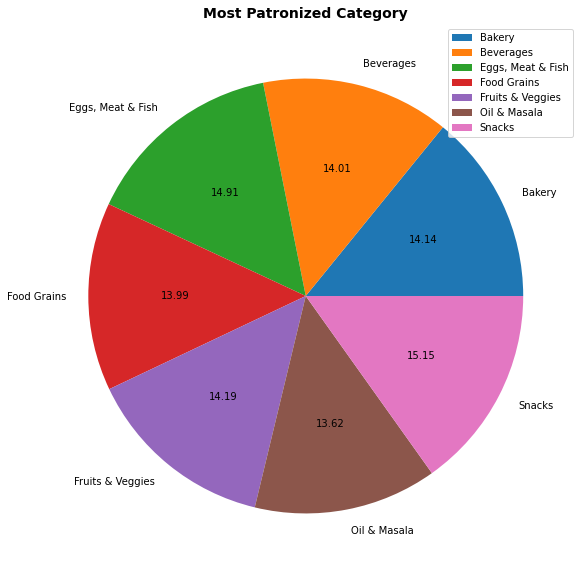

In [115]:
##plotting Pie Chart for Sub_Category by Category
sales_record.groupby('Category')[['Sub_Category']].count().plot(kind='pie',figsize=(10,10),subplots=True,legend=True,autopct='%.2f')
plt.ylabel("")                                                                                                  
plt.title('Most Patronized Category',fontsize=14,fontweight='bold')
plt.show()

## The pie chart shows that Snacks was the most patronized Category with 15.15%

## Task5: Who is the most outstanding customer in terms of patronage?

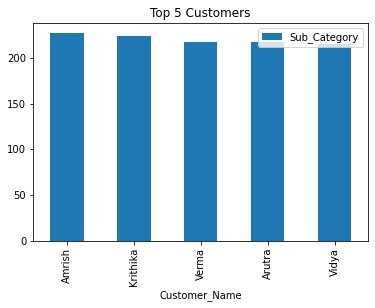

In [80]:
sales_record.groupby('Customer_Name')[['Sub_Category']].count().sort_values(by='Sub_Category',ascending=False).head(5).plot.bar()
plt.title('Top 5 Customers')
plt.show()

In [90]:
# Converting the date to python date
sales_record["Order_Date"]=pd.to_datetime(sales_record["Order_Date"])

In [94]:
#To find the year in the date and renaming the Order_Date
sales_record["Year"] = sales_record["Order_Date"].dt.year

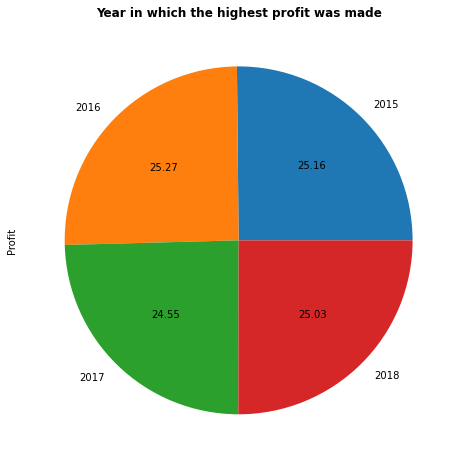

In [119]:
# Plotting a bar chart
sales_record.groupby("Year")["Profit"].mean().plot(kind="pie", autopct='%.2f' ,figsize=(8,8))
plt.title("Year in which the highest profit was made", fontweight='bold',)
plt.show()

# The Supermart made the highest profit in year 2016

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:>

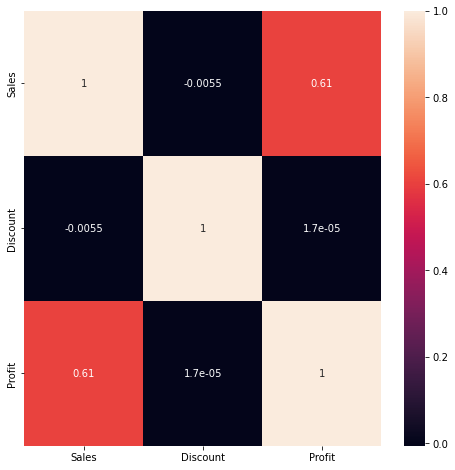

In [81]:
#multivariate analysis cells
# Correlation between sales, profit, and discount

plt.figure(figsize=(8,8))
sns.heatmap(sales_record.corr(),annot=True)

## From the chart above we can see that there is positive correlation betwween sales and profit.

In [82]:
#multivariate analysis cells


In [ ]:
#multivariate analysis cells


In [ ]:
#multivariate analysis cells


# The most profit was made in year 2018

# Summary

In this markdown cell, summarize your list of findings.

1. 
2. 
3. 
4. 